# Phase 3: Unsupervised learning

For the unsupervised learning phase we choose K-means clustering algorithm.K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. The goal is to identify the K number of groups in the dataset.It is an iterative process of assigning each data point to the groups and slowly data points get clustered based on similar features. The objective is to minimize the sum of distances between the data points and the cluster centroid, to identify the correct group each data point should belong to.[source] 

[source] Sharma, N. (2023) K-means clustering explained, neptune.ai. Available at: https://neptune.ai/blog/k-means-clustering (Accessed: 19 May 2023). 

Importing Important Libraries

In [269]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings #to remove the warnings
warnings.filterwarnings('ignore')

In [270]:
#iris = pd.read_csv('C:\AI-Project\Dataset\waterQualityCleaned.csv')
#iris = pd.read_csv('C:/Users/khawlahalnayel/Desktop/AI-Project/Dataset/waterQualityCleaned.csv')
iris = pd.read_csv('C:/fluttergithubapp/AI-Project/AI-Project/Dataset/waterQualityCleaned.csv')

In [271]:
iris

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3,2,4,2,3,3,1,3,3,3,0
1,4,3,4,2,2,1,2,1,1,2,0
2,5,1,4,3,2,2,1,1,1,1,0
3,6,3,4,3,2,3,1,2,3,1,0
4,7,3,4,1,1,1,3,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
2006,3267,3,4,1,1,1,2,1,1,3,1
2007,3268,2,4,1,2,1,1,3,1,1,1
2008,3269,3,2,3,3,1,2,3,1,3,1
2009,3270,1,4,3,3,2,2,1,2,2,1


WCSS and Elbow Method wich is used to select the good number of clusters.The elbow method is a graphical representation of finding the optimal ‘K’ in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.The elbow graph shows WCSS values(on the y-axis) corresponding to the different values of K(on the x-axis). When we see an elbow shape in the graph, we pick the K-value where the elbow gets created. We can call this point the Elbow point. Beyond the Elbow point, increasing the value of ‘K’ does not lead to a significant reduction in WCSS.[source]

[source]Tomar, A. (2022) Stop using elbow method in k-means clustering, instead, use this!, Medium. Available at: https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d (Accessed: 20 May 2023). 

Note: you may need to restart the kernel to use updated packages.


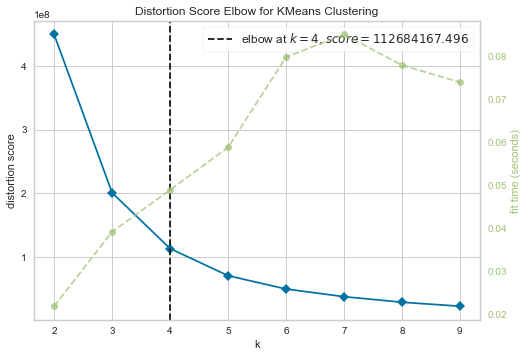

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [272]:
#Source:https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d
#install yellowbrick to vizualize the Elbow curve
%pip install yellowbrick  

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from yellowbrick.cluster import KElbowVisualizer

features = list(iris.columns)[:-2]

# Get the features data
data = iris[features]

clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(data)

X = data
y = data['clusters']

# Instantiate the clustering model and visualizer
km = KMeans(random_state=1)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Based on the elbow method, we choose 4 as best value of k, also we deside to choose 5 because it's near to 4, the last value of k we choose 2 to see the diifrence betewen right and wrong value of k. So, k values are 2,4 and 5


**1- K with size 2:**

Get all the features columns except the class

In [273]:
features = list(iris.columns)[:-2]

# Get the features data
data = iris[features]

Here we have number of cluster = 2, then we fit the data

In [274]:
clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(data)

Because we have 3 or more column,we cannot visualize the clustering directly. However, we apply a Principal Component Analysis to reduce the space in 2 columns and visualize this instead.

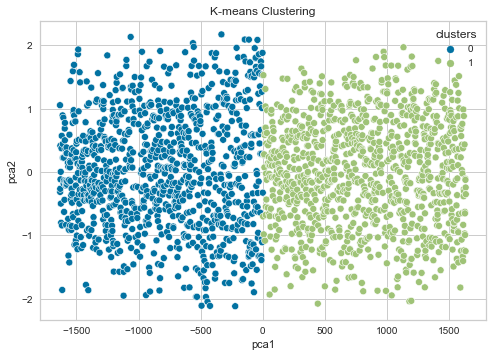

In [275]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering')
plt.show()

As we can see here, after we apply clustering with k=2 , we got these 2 groups. first group with orange color have pca1 from 0 to almost 1500, second group with blue color have pca1 less than 0 to -1500. two groups are so close 

**2- K with size 4:**

Here we have number of cluster = 4, then we fit the data

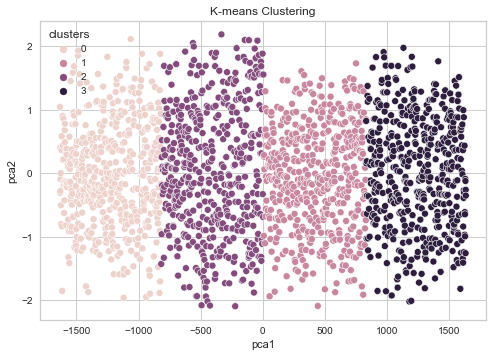

In [276]:
clustering_kmeans = KMeans(n_clusters=4)
data['clusters'] = clustering_kmeans.fit_predict(data)

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering')
plt.show()

As we can see here, it is better than k=2 since we can see different clusters in different location without overlapping between them

**3- K with size 5:**

Here we have number of cluster = 5, then we fit the data

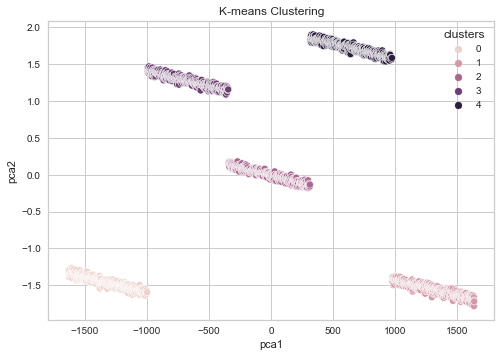

In [277]:
clustering_kmeans = KMeans(n_clusters=5)
data['clusters'] = clustering_kmeans.fit_predict(data)

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering')
plt.show()

As we can see here, it is also better than k=2, and same as k=4 we can see different clusters in different location without overlapping between them

**Evaluation Methods**

To evalute the k-means clustring we will use different methods and metrics which are Silhouette coefficient , total within-cluster sum of square , BCubed precision and recall along with visualization of each method and metric along with our obsrvation of the results.

**1.Silhouette coefficient**

Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified.The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters[source]

[source]Silhouette (clustering) (2023) Wikipedia. Available at: https://en.wikipedia.org/wiki/Silhouette_(clustering) (Accessed: 19 May 2023). 

Import the libraries from sklearn

In [278]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

Implement the silhouette algorithm.We can observe the fllowing results for each clustering values [2 ,4 ,5] :

2: 0.627481431521672,

4: 0.5701792797942534,

5: 0.5695587418652014

as the silhouette coefficient results the values from the range of -1 to +1 we can see that the k=2 provides the best silhouette coefficient value and the closest to +1.

In [279]:

silhouette_scores = dict()
range_of_k = range(2,3)
for k in range_of_k :
    untrained_model = KMeans(n_clusters=k)
    trained_model=untrained_model.fit(reduced_data)
    cluster_labels = trained_model.labels_
    score=silhouette_score(reduced_data, cluster_labels)
    S_2=score
    # silhouette_scores[k]=score
print("The k=2 Silhouette scores is : ",score)

The k=2 Silhouette scores is :  0.6274813527601543


In [280]:
silhouette_scores = dict()
range_of_k = range(4,5)
for k in range_of_k :
    untrained_model = KMeans(n_clusters=k)
    trained_model=untrained_model.fit(reduced_data)
    cluster_labels = trained_model.labels_
    score=silhouette_score(reduced_data, cluster_labels)
    s_4=score
    # silhouette_scores[k]=score
print("The k=4 Silhouette scores is : ",score)

The k=4 Silhouette scores is :  0.5702321126555172


In [281]:
silhouette_scores = dict()
range_of_k = range(5,6)
for k in range_of_k :
    untrained_model = KMeans(n_clusters=k)
    trained_model=untrained_model.fit(reduced_data)
    cluster_labels = trained_model.labels_
    score=silhouette_score(reduced_data, cluster_labels)
    S_5=score
    # silhouette_scores[k]=score
print("The k=5 Silhouette scores is : ",score)

The k=5 Silhouette scores is :  0.5696045025632405


Here we Visualized the results of each clustring value and as the figure shows the k=2 provides the best silhouette coefficient results and the closest value to +1.And according to the plot below we can see that k=2 has the closest value to +1 

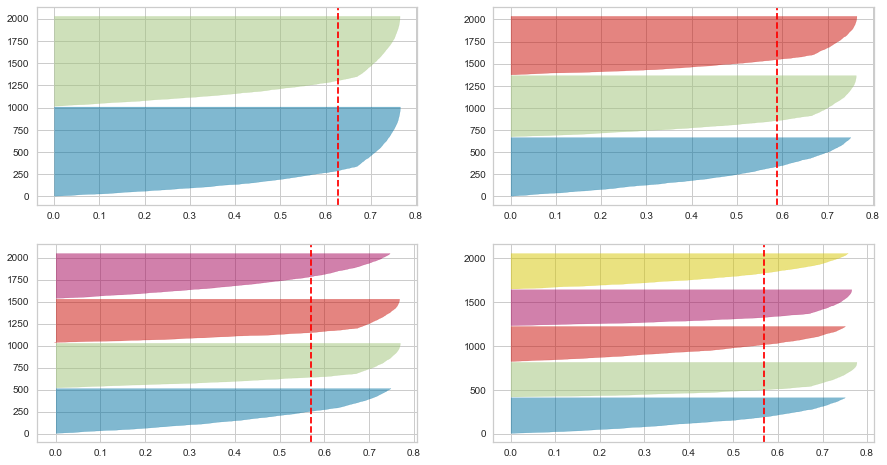

In [282]:
#Source:https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

**2.Total within-cluster sum of square**

The within-cluster sum of squares is a measure of the variability of the observations within each cluster. In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares. Clusters that have higher values exhibit greater variability of the observations within the cluster.[source]

[source]Interpret all statistics and graphs for Cluster K-means (no date) Minitab. Available at: https://support.minitab.com/en-us/minitab/21/help-and-how-to/statistical-modeling/multivariate/how-to/cluster-k-means/interpret-the-results/all-statistics-and-graphs/#:~:text=The%20within%2Dcluster%20sum%20of%20squares%20is%20a%20measure%20of,a%20large%20sum%20of%20squares. (Accessed: 19 May 2023). 

For the clusters we have k = 2,4,5 each cluster provides diffrent reslutes.

In k = 2 the TWSS equals to 152.347 approximately.While in k = 4 the TWSS equals to 57.22 approximately and in k = 5 the TWSS equals to 46.46 approximately.And According to the Total Within Cluster Sum of Squares the smaller the value is the more compact the cluster is and in our case k = 5 has the smallest value compared to k = 2 and k = 4.

In [283]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import load_iris


features = list(iris.columns)[:-2]

# Get the features data
data = iris[features]

clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(data)

X = data
y = data['clusters']


# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Calculate the total within-cluster sum of squares
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
distances = np.sum((X - centroids[labels])**2, axis=1)
total_within_cluster_sum_of_squares = np.sum(distances)

print(" Total within cluster sum of squares for (k = 2): ",total_within_cluster_sum_of_squares)


 Total within cluster sum of squares for (k = 2):  449651517.4079324


In [284]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import load_iris

features = list(iris.columns)[:-2]

# Get the features data
data = iris[features]

clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(data)

X = data
y = data['clusters']

# Perform k-means clustering with k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Calculate the total within-cluster sum of squares
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
distances = np.sum((X - centroids[labels])**2, axis=1)
total_within_cluster_sum_of_squares = np.sum(distances)

print(" Total within cluster sum of squares for (k = 4): ",total_within_cluster_sum_of_squares)

 Total within cluster sum of squares for (k = 4):  112649697.09214884


In [291]:
from sklearn.cluster import KMeans
import numpy as np

features = list(iris.columns)[:-2]

# Get the features data
data = iris[features]

clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(data)

X = data
y = data['clusters']

# Perform k-means clustering with k=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Calculate the total within-cluster sum of squares
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
distances = np.sum((X - centroids[labels])**2, axis=1)
total_within_cluster_sum_of_squares = np.sum(distances)

print(" Total within cluster sum of squares for (k = 5): ",total_within_cluster_sum_of_squares)

 Total within cluster sum of squares for (k = 5):  69983133.40046185


**3.BCubed precision and recall**

BCubed metrics decompose the evaluation process estimating the precision and recall associated to each item in the distribution. The item precision represents how many items in the same cluster belong to its category. Symmetrically, the recall associated to one item represents how many items from its category appear in its cluster[source]

[source]Interpret all statistics and graphs for Cluster K-means (no date a) Minitab. Available at: https://support.minitab.com/en-us/minitab/21/help-and-how-to/statistical-modeling/multivariate/how-to/cluster-k-means/interpret-the-results/all-statistics-and-graphs/#:~:text=The%20within%2Dcluster%20sum%20of%20squares%20is%20a%20measure%20of,a%20large%20sum%20of%20squares. (Accessed: 19 May 2023). 

Import Libarires

In [293]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np

*For K = 2*

In [302]:
features = list(iris.columns)[:-2]

# Get the features data
data = iris[features]

clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(data)

X = data
y = data['clusters']

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Extract the predicted cluster labels from the KMeans object
y_pred = kmeans.labels_

# Calculate BCubed precision
precision = precision_score(y, y_pred, average='micro')
print('BCubed precision for (K = 2):', precision)

BCubed precision for (K = 2): 1.0


In [303]:
features = list(iris.columns)[:-2]

# Get the features data
data = iris[features]

clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(data)

X = data
y = data['clusters']

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Extract the predicted cluster labels from the KMeans object
y_pred = kmeans.labels_

# Calculate BCubed recall
labels = np.unique(y)
recall = 0
for label in labels:
    idx = np.where(y == label)[0]
    recall += np.sum(y[idx] == y_pred[idx]) / len(idx)
recall /= len(labels)
print('BCubed recall for (K = 2):', recall)

BCubed recall for (K = 2): 0.0


*For K = 4*

In [304]:
features = list(iris.columns)[:-2]

# Get the features data
data = iris[features]

clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(data)

X = data
y = data['clusters']

# Perform k-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Extract the predicted cluster labels from the KMeans object
y_pred = kmeans.labels_

# Calculate BCubed precision
precision = precision_score(y, y_pred, average='micro')
print('BCubed precision for (K = 4):', precision)

BCubed precision for (K = 4): 0.5032322227747389


In [305]:
features = list(iris.columns)[:-2]

# Get the features data
data = iris[features]

clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(data)

X = data
y = data['clusters']

# Perform k-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Extract the predicted cluster labels from the KMeans object
y_pred = kmeans.labels_

# Calculate BCubed recall
labels = np.unique(y)
recall = 0
for label in labels:
    idx = np.where(y == label)[0]
    recall += np.sum(y[idx] == y_pred[idx]) / len(idx)
recall /= len(labels)
print('BCubed recall for (K = 4):', recall)

BCubed recall for (K = 4): 0.0


*For K=5*

In [306]:
features = list(iris.columns)[:-2]

# Get the features data
data = iris[features]

clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(data)

X = data
y = data['clusters']

# Perform k-means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Extract the predicted cluster labels from the KMeans object
y_pred = kmeans.labels_

# Calculate BCubed precision
precision = precision_score(y, y_pred, average='micro')
print('BCubed precision for (K = 5):', precision)

BCubed precision for (K = 5): 0.0


In [308]:
features = list(iris.columns)[:-2]

# Get the features data
data = iris[features]

clustering_kmeans = KMeans(n_clusters=2)
data['clusters'] = clustering_kmeans.fit_predict(data)

X = data
y = data['clusters']
# Perform k-means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Extract the predicted cluster labels from the KMeans object
y_pred = kmeans.labels_

# Calculate BCubed recall
labels = np.unique(y)
recall = 0
for label in labels:
    idx = np.where(y == label)[0]
    recall += np.sum(y[idx] == y_pred[idx]) / len(idx)
recall /= len(labels)

print('BCubed recall for (K = 5):', recall)

BCubed recall for (K = 5): 0.0


# comparison
--------------------------------------------------------------------------------------------------------------------------------

After creating and evaluating the three different sizes of K, we can compare them to determine the best size based on the values of the silhouette coefficient. The silhouette coefficient provides a measure of how well each clustering solution separates the data points.


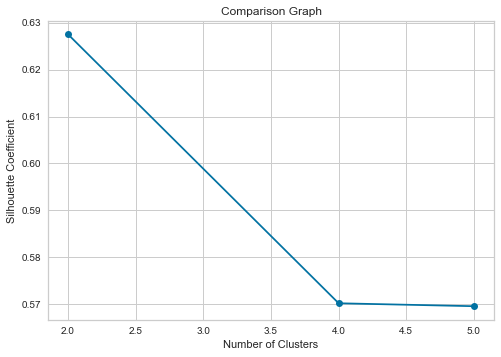

In [309]:
#Creating an array with the values of K.
k_values = [2,4,5]

#Creating an array with the values of the silhouette coefficient for each value of K respectively.
sc_values = [S_2, s_4, S_5]

#Plotting the graph.
plt.title("Comparison Graph")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.plot(k_values,sc_values, 'o-')

Based on the previous analysis, we have determined that the optimal number of clusters, as determined by the silhouette coefficient, is 2. This K value exhibited the highest silhouette coefficient value among all three evaluated sizes. Hence, for our dataset, the optimal K value is 2.